# Internal Point Method
In thi notebook we test the various implementation of the interior point method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from plot import plot_LP, plot_QP
from problem import LPProblem, QPProblem

## Linear Programming

the problem:

In [2]:
# LP problem
A = np.array(
    [[ 2,  1],
     [ 2,  3],
     [ 4,  3],
     [-1, -2]], dtype=np.float64)
b = np.array([120, 210, 270, -60], dtype=np.float64)
c = np.array([-10, -14], dtype=np.float64)

# standard form
A_std = np.hstack([A, np.eye(A.shape[0])])
c_std = np.concatenate((c, np.zeros((A.shape[0],))))

LP = LPProblem(A_std, b, c_std)

run the algorithm:

In [3]:
x, lam, s, converge, n_iter, steps = LP.internal_point(tolerance=1e-8)

A (4, 6):
[[ 2.  1.  1.  0.  0.  0.]
 [ 2.  3.  0.  1.  0.  0.]
 [ 4.  3.  0.  0.  1.  0.]
 [-1. -2.  0.  0.  0.  1.]]
b (4,):
[120. 210. 270. -60.]
c (6,):
[-10. -14.   0.   0.   0.   0.]
lo (6,):
[-inf -inf -inf -inf -inf -inf]
hi (6,):
[inf inf inf inf inf inf]
--------------------------------------------------------------------------------
iter [0]:
x:	[56.55466879 41.12609737 13.69752594 45.41181165 16.26895451 54.84038308],
lam:	[-0.05714286 -2.11428571 -1.14285714  1.57142857],
s:	[4.02142857 2.50714286 3.59285714 5.65       4.67857143 1.96428571]
--------------------------------------------------------------------------------
iter [1]:
x:	[29.12490977 47.94152054 13.80865992  7.92561884  9.6757993  65.00795085],
lam:	[ 0.21116952 -3.18487417 -1.13814918  0.41914872],
s:	[1.35794632 0.03498957 0.22762206 3.62366576 1.57694076 0.01964286]
--------------------------------------------------------------------------------
iter [2]:
x:	[27.03821249 51.94810627 13.97546874  0.07925619 

In [4]:
if converge:
    x = x[:A.shape[1]]
    solution = np.sum(c * x)
    print(f'The Algorithm is converged after {n_iter} iterations.\n' \
          f'The Optimal solution is {solution}')
else:
    print("The Algorithm is not converged to a solution!")

The Algorithm is converged after 4 iterations.
The Optimal solution is -999.9999972703027


plot the results:

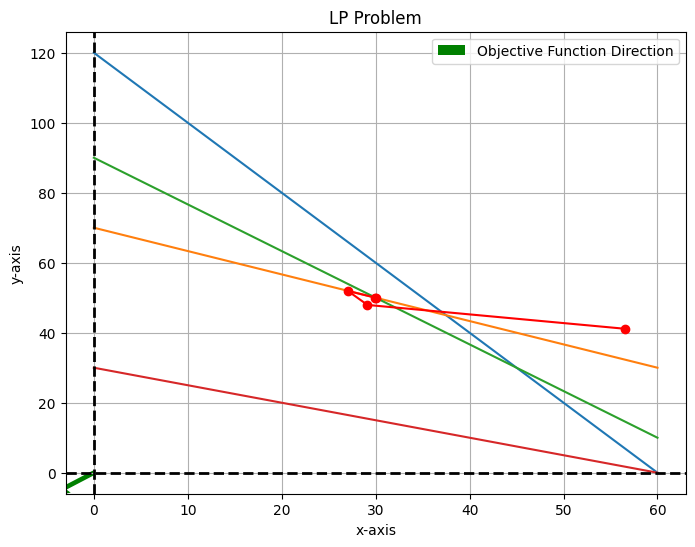

In [5]:
plot_LP(A, b, c, steps, max_scale=60)

## Quadratic Programming

the problem:

In [6]:
# QP problem 
Q = np.array(
    [
        [ 1, -1],
        [-1,  2]
    ], dtype=np.float64)
A = np.array(
    [[ 1,  1],
     [-1,  2],
     [ 2,  1]], dtype=np.float64)
b = np.array([2, 2, 3], dtype=np.float64)
c = np.array([-2, -6], dtype=np.float64)

# standard form
A_std = np.hstack([A, np.eye(A.shape[0])])
c_std = np.concatenate((c, np.zeros((A.shape[0],))))
Q_std = np.pad(Q, (0, A.shape[0]), 'constant', constant_values=0)

QP = QPProblem(A_std, b, c_std, Q_std)

run the algorithm:

In [7]:
x, lam, s, converge, n_iter, steps = QP.internal_point(tolerance=1e-8)

(3, 5) (5, 5)
Problem size: 3, 5
A (3, 5):
[[ 1.  1.  1.  0.  0.]
 [-1.  2.  0.  1.  0.]
 [ 2.  1.  0.  0.  1.]]
b (3,):
[2. 2. 3.]
c (5,):
[-2. -6.  0.  0.  0.]
Q (5, 5):
[[ 1. -1.  0.  0.  0.]
 [-1.  2.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
lo (5,):
[-inf -inf -inf -inf -inf]
hi (5,):
[inf inf inf inf inf]
--------------------------------------------------------------------------------
iter [0]:
x:	[0.88025701 1.38025701 0.31775701 0.50525701 0.63025701],
lam:	[-1.         -1.5        -1.16666667],
s:	[1.70833333 1.04166667 2.875      3.375      3.04166667]
--------------------------------------------------------------------------------
iter [1]:
x:	[0.72619587 1.22244716 0.05135697 0.28130154 0.3251611 ],
lam:	[-1.73576108 -0.86430883 -0.82437773],
s:	[0.06888871 0.01041667 1.77129002 0.89983778 0.85990667]
--------------------------------------------------------------------------------
iter [2]:
x:	[0.69104929 1.30671895 0.00223176 0.077

In [8]:
if converge:
    x = x[:A.shape[1]]
    solution = np.sum(x @ c + 0.5 * x.T @ Q @ x)
    print(f'The Algorithm is converged after {n_iter} iterations.\n' \
          f'The Optimal solution is {solution} with x: {x}')
else:
    print("The Algorithm is not converged to a solution!")

The Algorithm is converged after 5 iterations.
The Optimal solution is -8.222222221177553 with x: [0.66666667 1.33333333]


plot the results:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


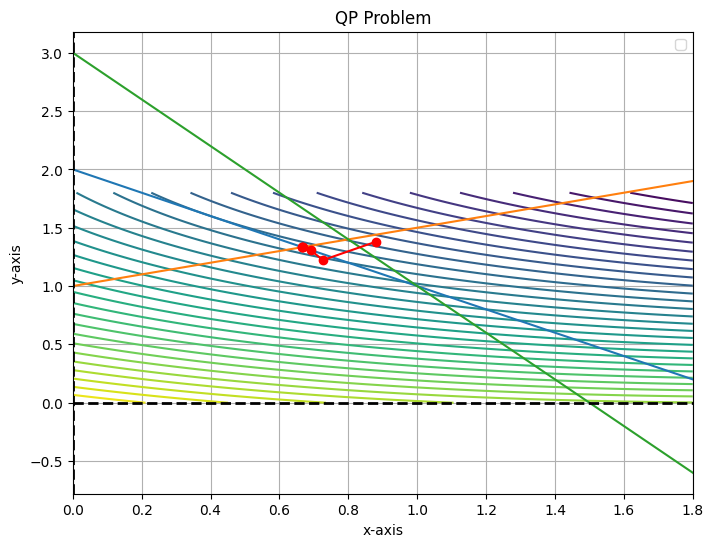

In [9]:
plot_QP(A, b, c, Q, steps, max_scale=1.8)

## Lexicographic MOQP